In [3]:
import sklearn

In [4]:
from sklearn.datasets import make_circles

n_samples=1000

x,y=make_circles(n_samples, noise=0.03, random_state=42)


In [5]:
len(x),len(y)

(1000, 1000)

In [6]:
print(f"First five samples of x: {x[:5]}")
print(f"First five samples of y: {y[:5]}")


First five samples of x: [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First five samples of y: [1 1 1 1 0]


In [7]:
x.shape

(1000, 2)

In [8]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [9]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [10]:
import pandas as pd
circles=pd.DataFrame({"X1":x[:,0],
                      "X2":x[:,1],
                      "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


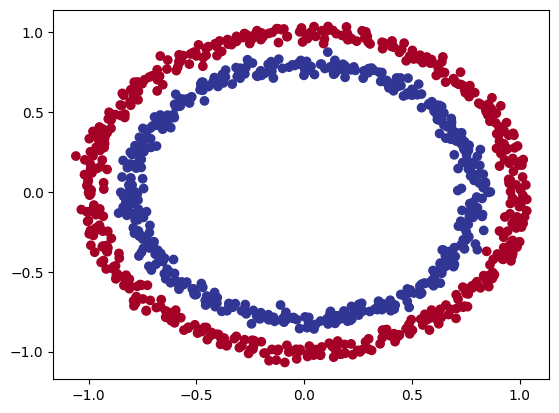

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)

In [12]:
x.shape,y.shape

((1000, 2), (1000,))

In [13]:
x_samples=x[0]
y_samples=y[0]
print(f"Number of samples in x: {x_samples}")
print(f"Number of samples in y: {y_samples}")
print(f"Number of shapes in x: {x_samples.shape}")
print(f"Number of shapes in y: {y_samples.shape}")

Number of samples in x: [0.75424625 0.23148074]
Number of samples in y: 1
Number of shapes in x: (2,)
Number of shapes in y: ()


In [14]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [15]:
x.dtype,type(x),y.dtype,type(y)

(dtype('float64'), numpy.ndarray, dtype('int64'), numpy.ndarray)

In [16]:
x=torch.from_numpy(x).type(torch.float)
y=torch.from_numpy(y).type(torch.float32) # Changed to float32 to match model output
x.dtype, y.dtype

x[:5],y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
y = y.type(torch.float32)
x.dtype, y.dtype

(torch.float32, torch.float32)

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [19]:
len(x_train),len(y_train),len(x_test),len(y_test)

(800, 800, 200, 200)

In [20]:
n_samples

1000

In [21]:
import torch
from torch import nn
device="cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [22]:
x_train

tensor([[ 0.6579, -0.4651],
        [ 0.6319, -0.7347],
        [-1.0086, -0.1240],
        ...,
        [ 0.0157, -1.0300],
        [ 1.0110,  0.1680],
        [ 0.5578, -0.5709]])

In [23]:
class CircleModelV0(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1=nn.Linear(in_features=2,out_features=5)
        self.layer_2=nn.Linear(in_features=5,out_features=1)


    def forward(self,x):
        return self.layer_2(self.layer_1(x))

model_0=CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [24]:
device

'cpu'

In [25]:
next(model_0.parameters()).device

device(type='cpu')

In [26]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [27]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1563,  0.6139],
                      [-0.6658, -0.2988],
                      [ 0.1849, -0.0900],
                      [-0.6426,  0.4407],
                      [ 0.0076, -0.5876]])),
             ('0.bias', tensor([-0.2476,  0.0362,  0.3016,  0.2784,  0.4427])),
             ('1.weight',
              tensor([[-0.1704, -0.3537,  0.2748,  0.1788, -0.1937]])),
             ('1.bias', tensor([-0.1224]))])

In [28]:
# make predictions
with torch.inference_mode():
    untrained_preds=model_0(x_test.to(device))

print(f"len of test preds: {len(untrained_preds)}")
print(f"shape of test preds: {untrained_preds.shape}")
print(f"first 10 preds: {torch.round(untrained_preds[:10])}")
print(f"first 10 actuals: {y_test[:10]}")




len of test preds: 200
shape of test preds: torch.Size([200, 1])
first 10 preds: tensor([[0.],
        [0.],
        [-0.],
        [0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [0.]])
first 10 actuals: tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [29]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)

In [30]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.1563,  0.6139],
                      [-0.6658, -0.2988],
                      [ 0.1849, -0.0900],
                      [-0.6426,  0.4407],
                      [ 0.0076, -0.5876]])),
             ('0.bias', tensor([-0.2476,  0.0362,  0.3016,  0.2784,  0.4427])),
             ('1.weight',
              tensor([[-0.1704, -0.3537,  0.2748,  0.1788, -0.1937]])),
             ('1.bias', tensor([-0.1224]))])

In [31]:
def accuracy_fn(y_true,y_pred):
    correct=torch.eq(y_true,y_pred).sum().item()
    acc=correct/len(y_pred)*100
    return acc


In [32]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [33]:
model_0.eval()
with torch.inference_mode():
    y_logits=model_0(x_test.to(device))


y_logits[:10]

tensor([[-0.2749],
        [-0.3139],
        [-0.2314],
        [-0.2870],
        [-0.3245],
        [-0.3476],
        [-0.3835],
        [-0.3917],
        [-0.2275],
        [-0.3175]])

In [34]:
y_preds=torch.round(torch.sigmoid(y_logits))[:5]
y_preds

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]])

In [35]:
y_pred=torch.round(y_preds)

y_pred_labels=torch.round(torch.sigmoid(model_0(x_test.to(device))[:5]))

print(torch.eq(y_pred.squeeze(),y_pred_labels.squeeze()))

y_pred.squeeze()


tensor([True, True, True, True, True])


tensor([0., 0., 0., 0., 0.])

In [36]:
torch.manual_seed(42)


epochs=10

x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test=x_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_0.train()

  y_logits=model_0(x_train).squeeze(dim=1)
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_0.eval()
  with torch.inference_mode():

    test_logits=model_0(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    test_loss=loss_fn(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)


  if epoch % 10==0:
    print(f"Epoch:{epoch} | Loss:{loss:.5f}, Acc:{acc:.2f}% | Test loss:{test_loss:.5f}, Test acc:{test_acc:.2f}%")


Epoch:0 | Loss:0.70494, Acc:50.00% | Test loss:0.70355, Test acc:50.00%


In [37]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists,skipping download")
else:
  print("Downloading helper_functions.py")
  request=requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py","wb") as f:
    f.write(request.content)

from helper_functions import plot_decision_boundary, plot_predictions



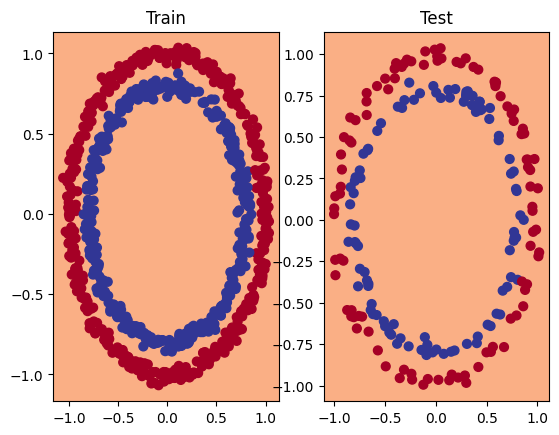

In [38]:
plt.figsize=(12,6)
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0,x_test,y_test)

In [39]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0686,  0.1654],
                      [-0.5044, -0.2046],
                      [-0.0129,  0.1930],
                      [-0.1728, -0.5233],
                      [-0.2998, -0.0403]])),
             ('0.bias', tensor([ 0.2304,  0.1383, -0.3560,  0.6004,  0.1059])),
             ('1.weight',
              tensor([[-0.4269,  0.1310, -0.2394, -0.2740,  0.3449]])),
             ('1.bias', tensor([-0.1759]))])

In [40]:
class CircleModuleV1(nn.Module):

  def __init__(self):
    super().__init__()
    self.layer_1=nn.Linear(in_features=2, out_features=10)
    self.layer_2=nn.Linear(in_features=10, out_features=10)
    self.layer_3=nn.Linear(in_features=10, out_features=1)

  def forward(self, x):
    return self.layer_3(self.layer_2(self.layer_1(x)))


model_1 = CircleModuleV1().to(device)
model_1

CircleModuleV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [41]:
model_1.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1

In [42]:
loss_fn=nn.BCEWithLogitsLoss()

optimizer=torch.optim.SGD(params=model_1.parameters(),lr=0.1)

In [43]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test=x_test.to(device), y_test.to(device)

for epoch in range(epochs):

  model_1.train()

  y_logits=model_1(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  loss=loss_fn(y_logits, y_train)
  acc= accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_logits=model_1(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)


  if epoch % 100==0:
    print(f"Epoch:{epoch}| Loss:{loss:.5f} ,Acc:{acc:.2f}% | Test loss:{test_loss}, Test acc:{test_acc}%")




Epoch:0| Loss:0.69396 ,Acc:50.88% | Test loss:0.6926146149635315, Test acc:51.0%
Epoch:100| Loss:0.69305 ,Acc:50.38% | Test loss:0.6937903761863708, Test acc:48.0%
Epoch:200| Loss:0.69299 ,Acc:51.12% | Test loss:0.6943727731704712, Test acc:46.0%
Epoch:300| Loss:0.69298 ,Acc:51.62% | Test loss:0.6945767998695374, Test acc:45.0%
Epoch:400| Loss:0.69298 ,Acc:51.12% | Test loss:0.6946452260017395, Test acc:46.0%
Epoch:500| Loss:0.69298 ,Acc:51.00% | Test loss:0.6946679949760437, Test acc:46.0%
Epoch:600| Loss:0.69298 ,Acc:51.00% | Test loss:0.6946756839752197, Test acc:46.0%
Epoch:700| Loss:0.69298 ,Acc:51.00% | Test loss:0.6946782469749451, Test acc:46.0%
Epoch:800| Loss:0.69298 ,Acc:51.00% | Test loss:0.6946792006492615, Test acc:46.0%
Epoch:900| Loss:0.69298 ,Acc:51.00% | Test loss:0.6946794390678406, Test acc:46.0%


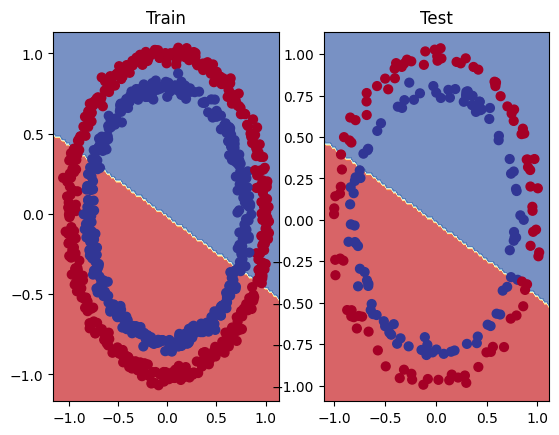

In [44]:
plt.figsize=(12,6)
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,x_train,y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_1,x_test,y_test)

In [45]:
weight=0.7
bias=0.3

start=0
end=1
step=0.01
x_reg=torch.arange(start, end, step).unsqueeze(dim=1)
y_reg=weight*x_reg + bias
x_reg[:5], y_reg[:5]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280]]))

In [46]:
train_split=int(0.8*len(x_reg))
x_train_reg, y_train_reg=x_reg[:train_split], y_reg[:train_split]
x_test_reg, y_test_reg=x_reg[train_split:], y_reg[train_split:]
len(x_train_reg), len(y_train_reg), len(x_test_reg), len(y_test_reg)


(80, 80, 20, 20)

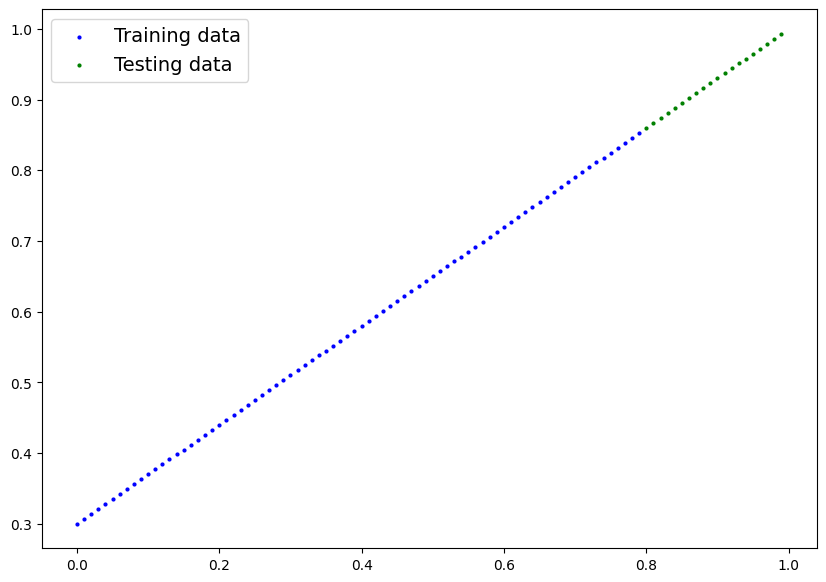

In [47]:
plot_predictions(train_data=x_train_reg,
                 train_labels=y_train_reg,
                 test_data=x_test_reg,
                 test_labels=y_test_reg);

In [48]:
model_1

CircleModuleV1(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [49]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

model_2


Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [50]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_2.parameters(), lr=0.001)

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


epochs=1000

x_train_reg, y_train_reg=x_train_reg.to(device), y_train_reg.to(device)
x_test_reg, y_test_reg=x_test_reg.to(device), y_test_reg.to(device)

for epoch in range(epochs):

  y_pred=model_2(x_train_reg)
  loss=loss_fn(y_pred, y_train_reg)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_pred=model_2(x_test_reg)
    test_loss=loss_fn(test_pred, y_test_reg)

  if epoch % 100==0:
    print(f"Epoch:{epoch}| Loss:{loss:.5f} | Test loss:{test_loss}")

Epoch:0| Loss:0.75986 | Test loss:0.9496515989303589
Epoch:100| Loss:0.40272 | Test loss:0.5402894616127014
Epoch:200| Loss:0.05876 | Test loss:0.1347997486591339
Epoch:300| Loss:0.01461 | Test loss:0.033422280102968216
Epoch:400| Loss:0.00308 | Test loss:8.409619476879016e-05
Epoch:500| Loss:0.00309 | Test loss:0.00012148022506153211
Epoch:600| Loss:0.00309 | Test loss:0.00017865300469566137
Epoch:700| Loss:0.00299 | Test loss:0.00011396408081054688
Epoch:800| Loss:0.00299 | Test loss:0.00016088485426735133
Epoch:900| Loss:0.00289 | Test loss:0.0001111567034968175


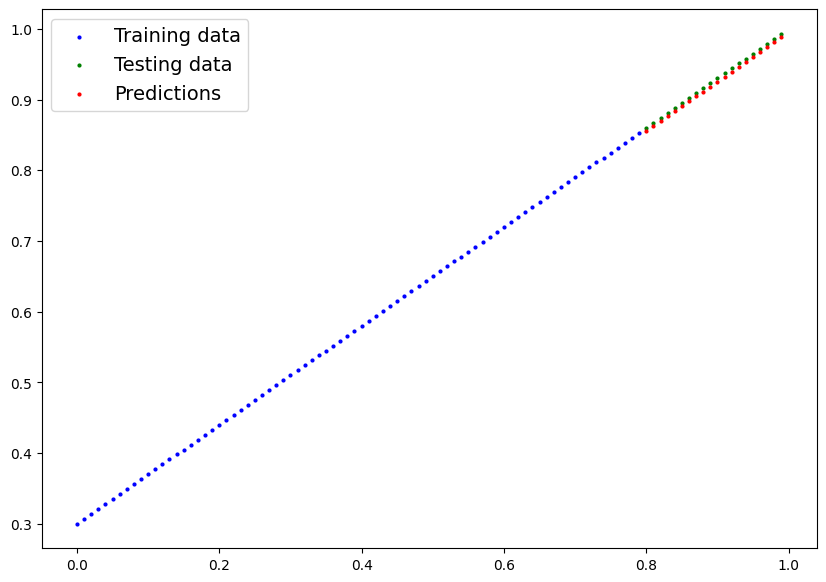

In [52]:
model_2.eval()
with torch.inference_mode():
  y_preds=model_2(x_test_reg)


  plot_predictions(train_data=x_train_reg.cpu(),
                 train_labels=y_train_reg.cpu(),
                 test_data=x_test_reg.cpu(),
                 test_labels=y_test_reg.cpu(),
                 predictions=y_preds)

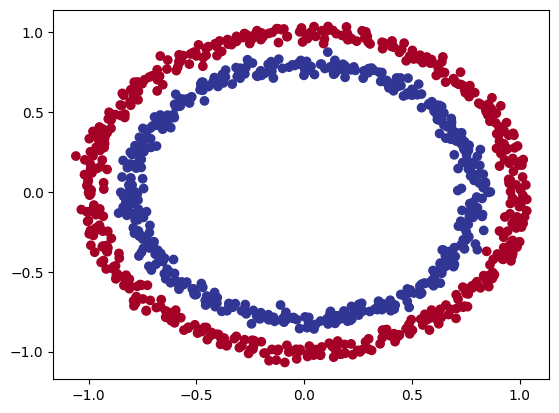

In [53]:
# Non-linearity of data and its functions
import torch
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_circles

n_samples=1000

x,y=make_circles(n_samples, noise=0.03, random_state=42)

plt.scatter(x=x[:,0],y=x[:,1],c=y,cmap=plt.cm.RdYlBu)








In [54]:
import torch
from sklearn.model_selection import train_test_split

x_=torch.from_numpy(x).type(torch.float)
y_=torch.from_numpy(y).type(torch.float)

x_train,x_test,y_train,y_test=train_test_split(x_,y_,test_size=0.2,random_state=42)

x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [55]:
device = "cuda" if torch.cuda.is_available() else "cpu"
x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

device

'cpu'

In [56]:
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):

    super().__init__()
    self.layer_1=nn.Linear(in_features=2,out_features=10)
    self.layer_2=nn.Linear(in_features=10,out_features=10)
    self.layer_3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))



model_3=CircleModelV2().to(device)
model_3





CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [57]:
loss_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_3.parameters(),lr=0.3)


In [58]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

x_train, y_train=x_train.to(device), y_train.to(device)
x_test, y_test=x_test.to(device), y_test.to(device)

epochs=1000

for epoch in range(epochs):

  model_3.train()

  y_logits=model_3(x_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))
  loss=loss_fn(y_logits, y_train)
  acc=accuracy_fn(y_true=y_train, y_pred=y_pred)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_logits=model_3(x_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits, y_test)
    test_acc=accuracy_fn(y_true=y_test, y_pred=test_pred)


    if epoch % 100==0:
      print(f"Epoch:{epoch}| Loss:{loss:.5f} ,Acc:{acc:.2f}% | Test loss:{test_loss}, Test acc:{test_acc}%")


Epoch:0| Loss:0.69295 ,Acc:50.00% | Test loss:0.6930580735206604, Test acc:50.0%
Epoch:100| Loss:0.68796 ,Acc:53.00% | Test loss:0.6871970891952515, Test acc:56.00000000000001%
Epoch:200| Loss:0.67525 ,Acc:54.37% | Test loss:0.6728016138076782, Test acc:56.49999999999999%
Epoch:300| Loss:0.62461 ,Acc:73.75% | Test loss:0.6216221451759338, Test acc:78.5%
Epoch:400| Loss:0.37448 ,Acc:97.38% | Test loss:0.40781086683273315, Test acc:92.5%
Epoch:500| Loss:0.36910 ,Acc:76.75% | Test loss:0.45300015807151794, Test acc:73.5%
Epoch:600| Loss:0.08191 ,Acc:100.00% | Test loss:0.11981077492237091, Test acc:97.5%
Epoch:700| Loss:0.04117 ,Acc:100.00% | Test loss:0.06973595172166824, Test acc:99.0%
Epoch:800| Loss:0.02686 ,Acc:100.00% | Test loss:0.04934491217136383, Test acc:99.0%
Epoch:900| Loss:0.01987 ,Acc:100.00% | Test loss:0.04013463109731674, Test acc:99.0%


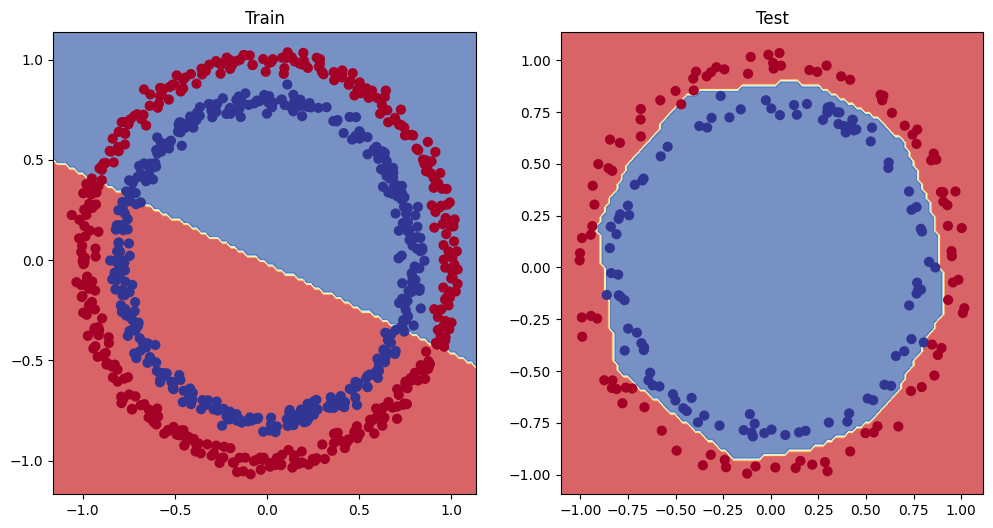

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title('Train')
plot_decision_boundary(model_1,x_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, x_test, y_test)


In [60]:
A = torch.arange(-10,10,1).float()

A.dtype


torch.float32

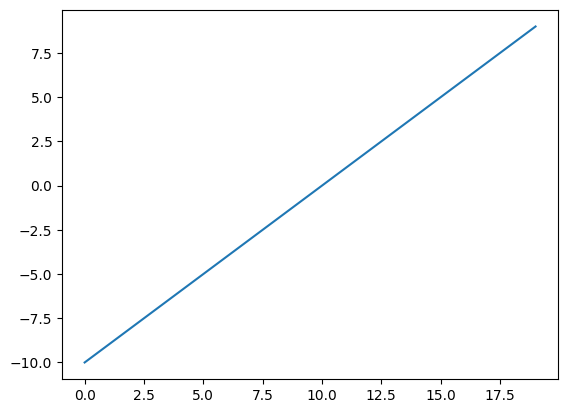

In [61]:
plt.plot(A)

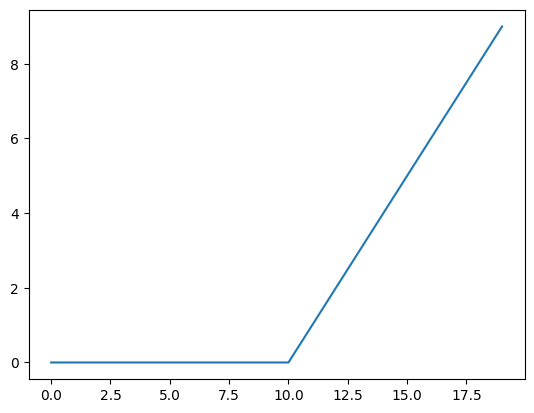

In [62]:
plt.plot(torch.relu(A))

In [63]:
def relu(x:torch.Tensor):
  return torch.maximum(torch.tensor(0),x)

relu(A)


tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

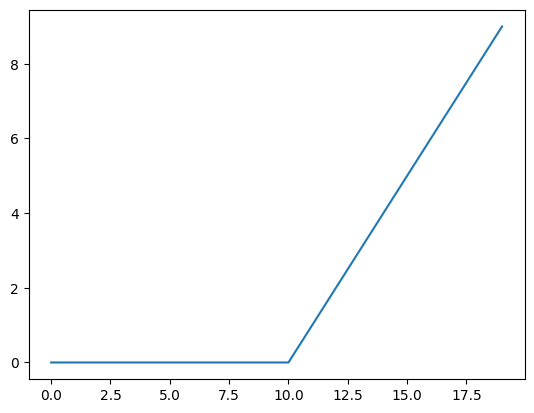

In [64]:
plt.plot(relu(A))

In [65]:
def sigmoid(x):
  return 1/(1+torch.exp(-x))

sigmoid(A)

tensor([4.5398e-05, 1.2339e-04, 3.3535e-04, 9.1105e-04, 2.4726e-03, 6.6929e-03,
        1.7986e-02, 4.7426e-02, 1.1920e-01, 2.6894e-01, 5.0000e-01, 7.3106e-01,
        8.8080e-01, 9.5257e-01, 9.8201e-01, 9.9331e-01, 9.9753e-01, 9.9909e-01,
        9.9966e-01, 9.9988e-01])

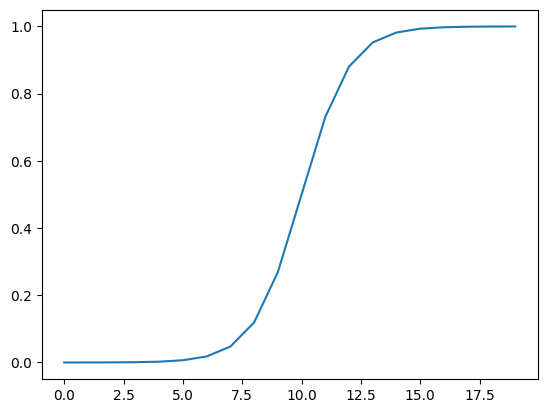

In [66]:
plt.plot(sigmoid(A))

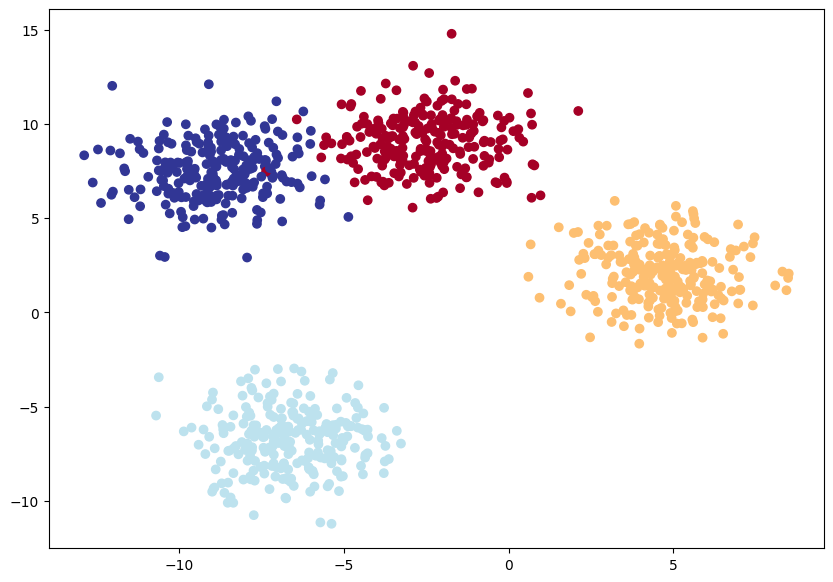

In [67]:
# multiclass classification
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

NUM_CLASSES=4
NUM_FEATURES=2
RANDOM_SEED=42

x_blob, y_blob=make_blobs(n_samples=1000,
                          n_features=NUM_FEATURES,
                          centers=NUM_CLASSES,
                          cluster_std=1.5,
                          random_state=RANDOM_SEED)

x_blob[:5], y_blob[:5]

x_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.long)

x_blob_train, x_blob_test, y_blob_train, y_blob_test=train_test_split(x_blob,
                                                                      y_blob,test_size=0.2, random_state=RANDOM_SEED)


plt.figure(figsize=(10, 7))
plt.scatter(x_blob[:,0], x_blob[:,1], c=y_blob,cmap=plt.cm.RdYlBu)

In [68]:
device="cuda" if torch.cuda.is_available()  else "cpu"
device


'cpu'

In [69]:
from torch import nn

class BlobModel(nn.Module):

  def __init__(self, input_features, output_features, hidden_units):

    super().__init__()
    self.linear_layer_stack=nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features)
    )

  def forward(self, x):
    return self.linear_layer_stack(x)


model_4=BlobModel(input_features=2,
                   output_features=4,
                   hidden_units=8).to(device)

model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [70]:
x_blob_train.shape, y_blob_train.shape[:5], y_blob_train[:5]

(torch.Size([800, 2]), torch.Size([800]), tensor([1, 0, 2, 2, 0]))

In [79]:
loss_fn=nn.CrossEntropyLoss()

optimizer=torch.optim.SGD(params=model_4.parameters(),lr=0.1)


In [80]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=100

x_blob_train, y_blob_train=x_blob_train.to(device), y_blob_train.to(device)
x_blob_test, y_blob_test=x_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):

  model_4.train()

  y_logits=model_4(x_blob_train)
  y_pred=torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss=loss_fn(y_logits, y_blob_train)
  acc=accuracy_fn(y_true=y_blob_train, y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits=+model_4(x_blob_test)
    test_pred=torch.softmax(test_logits, dim=1).argmax(dim=1)
    test_loss=loss_fn(test_logits, y_blob_test)
    test_acc=accuracy_fn(y_true=y_blob_test, y_pred=test_pred)

    if epoch % 10==0:
      print(f"Epoch:{epoch}| Loss:{loss:.5f} ,Acc:{acc:.2f}% | Test loss:{test_loss}, Test acc:{test_acc}%")


Epoch:0| Loss:0.02503 ,Acc:99.25% | Test loss:0.01439980510622263, Test acc:99.5%
Epoch:10| Loss:0.02493 ,Acc:99.25% | Test loss:0.014265728183090687, Test acc:99.5%
Epoch:20| Loss:0.02484 ,Acc:99.25% | Test loss:0.014137147925794125, Test acc:99.5%
Epoch:30| Loss:0.02476 ,Acc:99.25% | Test loss:0.0140167735517025, Test acc:99.5%
Epoch:40| Loss:0.02468 ,Acc:99.25% | Test loss:0.013903704471886158, Test acc:99.5%
Epoch:50| Loss:0.02460 ,Acc:99.25% | Test loss:0.013797147199511528, Test acc:99.5%
Epoch:60| Loss:0.02453 ,Acc:99.25% | Test loss:0.013697567395865917, Test acc:99.5%
Epoch:70| Loss:0.02446 ,Acc:99.25% | Test loss:0.013604607433080673, Test acc:99.5%
Epoch:80| Loss:0.02440 ,Acc:99.25% | Test loss:0.013516421429812908, Test acc:99.5%
Epoch:90| Loss:0.02434 ,Acc:99.25% | Test loss:0.013432903215289116, Test acc:99.5%


In [92]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(x_blob_test)

y_logits[:10]


tensor([[ -1.2936,   8.8913,  -9.4512, -10.5444],
        [ -2.4560,  -8.1329,  -5.2132,   4.5729],
        [ -4.6979,  -5.1014,   4.6407,  -3.6877],
        [ -2.0091,   6.4354,  -4.9649,  -6.1123],
        [  5.6706,  -1.8388, -11.2467,  -8.5157],
        [ -3.1122,  -9.6345,  -6.1134,   5.5244],
        [ -4.1428,  -4.3712,   4.0704,  -3.0643],
        [  5.0617,  -5.5500,  -8.6401,  -4.2541],
        [ -5.9770,  -6.5211,   5.6944,  -4.7317],
        [  5.3337,  -4.1675,  -9.3571,  -5.6644]])

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0])

In [83]:
y_blob_test

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 3, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

In [85]:
y_pred

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0, 0, 1, 0, 0, 0, 3, 3, 2, 3, 3, 3, 0, 1, 2,
        2, 2, 3, 0, 1, 0, 3, 1, 1, 3, 1, 2, 1, 3, 0, 2, 0, 3, 3, 2, 0, 3, 1, 1,
        0, 3, 1, 0, 1, 1, 3, 2, 1, 1, 3, 2, 2, 0, 3, 2, 2, 0, 0, 3, 3, 0, 0, 3,
        3, 3, 2, 3, 3, 3, 3, 1, 0, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3, 3, 1, 3, 3, 3,
        1, 0, 3, 2, 0, 0, 3, 0, 2, 3, 1, 0, 3, 2, 1, 1, 0, 2, 2, 3, 0, 0, 1, 2,
        2, 3, 0, 1, 2, 0, 0, 0, 2, 3, 1, 2, 3, 2, 0, 3, 0, 0, 1, 1, 1, 0, 2, 2,
        2, 2, 0, 3, 0, 2, 2, 1, 3, 2, 0, 0, 3, 3, 2, 1, 2, 0, 3, 2, 0, 3, 2, 0,
        2, 2, 2, 0, 3, 1, 1, 1, 1, 1, 3, 1, 0, 2, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
        1, 3, 2, 0, 3, 1, 2, 1])

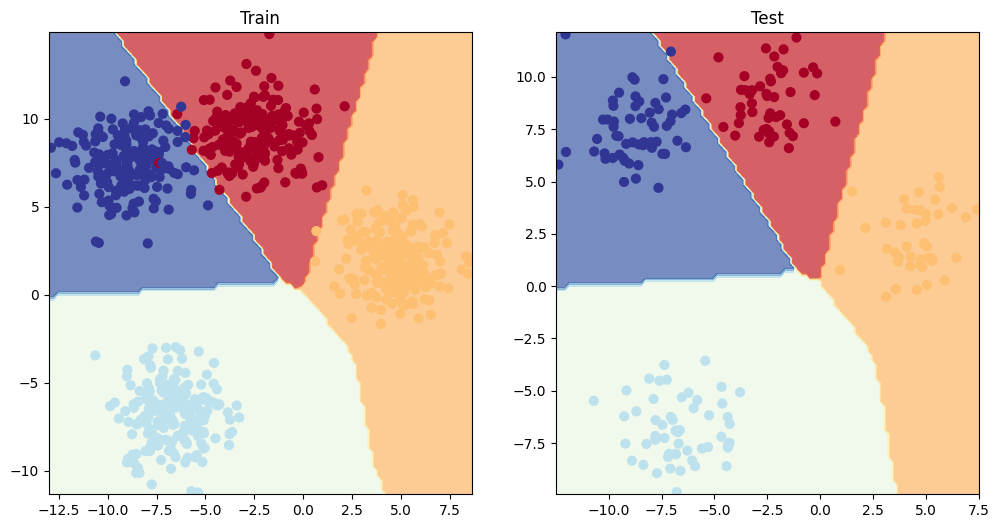

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")

plot_decision_boundary(model_4, x_blob_train, y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_4, x_blob_test, y_blob_test)

In [ ]:

next(model_4.parameters()).device

device(type='cpu')

In [ ]:
model_4.eval()
with torch.inference_mode():
  y_logits=model_4(x_blob_test.to(device))

y_logits[:10]



tensor([[ -1.2936,   8.8913,  -9.4512, -10.5444],
        [ -2.4560,  -8.1329,  -5.2132,   4.5729],
        [ -4.6979,  -5.1014,   4.6407,  -3.6877],
        [ -2.0091,   6.4354,  -4.9649,  -6.1123],
        [  5.6706,  -1.8388, -11.2467,  -8.5157],
        [ -3.1122,  -9.6345,  -6.1134,   5.5244],
        [ -4.1428,  -4.3712,   4.0704,  -3.0643],
        [  5.0617,  -5.5500,  -8.6401,  -4.2541],
        [ -5.9770,  -6.5211,   5.6944,  -4.7317],
        [  5.3337,  -4.1675,  -9.3571,  -5.6644]])

In [ ]:
y_blob_test[:10]

In [ ]:
y_preds=torch.softmax(y_logits, dim=1)
print(y_logits[:10])
print(y_preds[:10])

In [ ]:
    import torch

    # Example input logits
    logits = torch.tensor([1.0, 2.0, 3.0])

    # Apply softmax along dimension 0 (the only dimension in this case)
    probabilities = torch.softmax(logits, dim=0)

    print(probabilities)
    # Output will be a tensor like: tensor([0.0900, 0.2447, 0.6652])
    # Note that these values sum to approximately 1.0